**画出配点分布**

In [1]:
%reset -f

In [2]:
import sys, os
sys.path.append(os.path.dirname(os.path.realpath('../utils')))
import numpy as np
from matplotlib import pyplot as plt
from utils.aiwt import cjkfun, z_g, CompressInterp, adapt_CjJ4
from utils.pde import theta1_2d, Precise

In [3]:
J = 15
j0 = 0
a = 0
b = 2
Re = 1000
deltax = (b-a)/(2**J)
XJ0 = np.arange(a, b+deltax, deltax).reshape(1,-1)
V0 = np.sin(np.pi * XJ0)
M = 1
CC = 1
t = 0.4
tao = 0.001
eps0 = 0.005
nn_dict = {1:[1,'0.01'], 400:[3,'0.4'], 600:[5,'0.6'], 800:[1,'0.8'],
           1200:[3,'1.2'], 600:[5,'1.6'], 2000:[1,'2.0'], 2400:[3,'2.4'],
           2600:[5,'2.6'], 2800:[1,'2.8'], 3000:[3,'3.0'], 3200:[5,'3.2']}
cjk, cjknum, zJc, zJcnum = cjkfun(V0, J, j0, a, b, eps0)
gjk, gjknum, gJc, gJcnum = z_g(j0, J, cjk, cjknum, zJc, zJcnum, a, b, M, CC)
XJ = a + deltax * gJc
V0 = CompressInterp(XJ0, V0, XJ)
C = adapt_CjJ4(J, j0, gjk, gjknum, gJc, gJcnum, a, b)
theta1d, theta2d = theta1_2d(J, j0, a, b, C, gjk, gjknum, gJc, gJcnum)
V1 = Precise(V0, Re, theta1d,theta2d,gJcnum,tao)

In [4]:
def DrawCollocationPoint(ax, cjk,cjknum,a,b,j0,J):
    for j in range(j0, J):
        deltax = (b - a) / 2 ** (j+1)
        k = np.arange(cjknum[j])
        if(k.shape[0]==0):
            continue
        Y1 = np.ones(k.shape[0]) + j
        X1 = (0.5 + cjk[j]) * deltax
        ax.scatter(X1, Y1, s=8, c='k')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'Level $j$')
    ax.set_ylim([0, J])

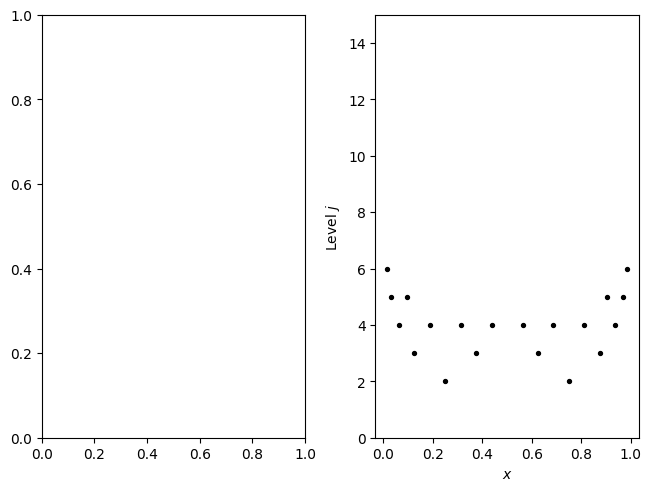

In [5]:
nn = 1
if nn_dict.get(nn):
    fig, axs=plt.subplots(1,2,constrained_layout=True)
    DrawCollocationPoint(axs[1], cjk, cjknum, a, b, j0,J)